# EDA project - 1000 movies data
### (INSAID Term I )

#### Submitted by - Selvan R

## Table of Contents

1. [Introduction](#section1)<br>
2. [Problem Statement](#section2)<br/>
3. [Data Loading and Description](#section3)<br/>
4. [Data Profiling](#section4)<br/>
    - 4.1 [Understanding the Dataset](#section401)<br/>
    - 4.2 [Pre Profiling](#section402)<br/>
    - 4.3 [Processing](#section403)<br/>
    - 4.4 [Post Profiling](#section404)<br/>
5. [Questions](#section5)<br/>
    - 5.1 [Which year had the maximum number of movie release ?](#section501)<br/>
    - 5.2 [Which year highest Revenue was generated ?](#section502)<br/>
    - 5.3 [Which Genre movie has generated the highest Revenue ?](#section503)<br/>
    - 5.4 [Which Genre has got maximum Rating ?](#section504)<br/>
    - 5.5 [Which director has directed maximum number of movies ?](#section505)<br/>
    - 5.6 [Which directors has the highest revenue generated ?](#section506)<br/>
    - 5.7 [Establish correlation between all the features using heatmap](#section507)<br/>
    - 5.8 [Relationship between 'Rating', 'Votes', 'Metascore'and 'Blockbuster'](#section508)<br/>
    - 5.9 [Analyzing Rating with Metascore and Revenue (Millions)](#section509)<br/>
    - 5.10 [Analyzing based on the column "Blockbuster"](#section510)<br/>
6. [Conclusions](#section6)<br/>  

<a id=section1></a>

# 1. Introduction

The notebooks explores the basic use of __Pandas__ and will cover the basic commands of __Exploratory Data Analysis(EDA)__ which includes __cleaning__, __munging__, __combining__, __reshaping__, __slicing__, __dicing__, and __transforming data__ for analysis purpose.

* __Exploratory Data Analysis__ <br/>
Understand the data by EDA and derive simple models with Pandas as baseline.
EDA ia a critical and first step in analyzing the data and we do this for below reasons :
    - Finding patterns in Data
    - Determining relationships in Data
    - Checking of assumptions
    - Preliminary selection of appropriate models
    - Detection of mistakes 


<a id=section2></a>

## 2. Problem Statement

A production house wants to produce a box office hit movie, they would like to know which Genre and director will give box office hit movie.

<a id=section3></a>

## 3. Data Description and Loading

#### Some Background Information

IMDb (Internet Movie Database) is an online database of information related to films, television programs, home videos and video games, and internet streams, including cast, production crew and personnel biographies, plot summaries, trivia, and fan reviews and ratings. An additional fan feature, message boards, was abandoned in February 2017. Originally a fan-operated website, the database is owned and operated by IMDb.com, Inc., a subsidiary of Amazon.

As of October 2018, IMDb has approximately 5.3 million titles (including episodes) and 9.3 million personalities in its database, as well as 83 million registered users.

#### Importing packages                                          

In [1]:
import numpy as np                                                 # Implemennts milti-dimensional array and matrices
import pandas as pd                                                # For data manipulation and analysis
import pandas_profiling
import matplotlib.pyplot as plt                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()

from subprocess import check_output

#### Importing the Dataset

In [2]:
dataframe = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/1000%20movies%20data.csv')     # Importing dataset using pd.read_csv


- The dataset consists of ratings of popular movies from IMDB.
- The dataset comprises of __1000 observations of 12 columns__. 
- Below is the summary of all the columns and their description.

| Column Name   | Description                                                                                                  |
| ------------- |:-------------                                                                                               :| 
| Rank          | IMDB Ranking of the movie                                                                                             | 
| Title         | The title of the movie                                                                                        | 
| Genre         | Movie genres category
| 
| Description   | Short summary of the movie                                                                              | 
| Director      | Director name
|
| Actors        | list of the stars in the movie 
|
| Year          | The year in which the movie was released
|
| Runtime       | The duration of the movie in minutes                                                                          |
| Rating        | User rating for the movie from 0-10                                                                               |
| Votes         | Number of votes by the user for the movie                                                                                             |
| Revenue       | Box office revenue of the movie in millions                                                                                    |
| Metascore     | An aggregated average of critic scores.Values are between 0 and 100.Higher scores represent positive reviews.|

<a id=section4></a>

## 4. Data Profiling

- In the upcoming sections we will first __understand our dataset__ using various pandas functionalities.
- Then with the help of __pandas profiling__ we will find which columns of our dataset need preprocessing.
- In __preprocessing__ we will deal with erronous and missing values of columns. 
- Again we will do __pandas profiling__ to see how preprocessing have transformed our dataset.

<a id=section401></a>

### 4.1 Understanding the Dataset

To gain insights from data we must look into each aspect of it very carefully. We will start with observing few rows and columns of data both from the starting and from the end


In [3]:
dataframe.shape                         # This will print the number of rows and comlumns of the Data Frame

(1000, 12)

matches dataframe has 696 rows__ and __18 columns.__

In [4]:
dataframe.columns                                            # This will print the names of all columns.

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [5]:
dataframe.head()                                           # This will print the first n rows of the Data Frame  

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [6]:
dataframe.tail()                                # This will print the last n rows of the Data Frame

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
995,996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0
998,999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0
999,1000,Nine Lives,"Comedy,Family,Fantasy",A stuffy businessman finds himself trapped ins...,Barry Sonnenfeld,"Kevin Spacey, Jennifer Garner, Robbie Amell,Ch...",2016,87,5.3,12435,19.64,11.0


In [7]:
dataframe.info()                                        # This will give Index, Datatype and Memory information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
Rank                  1000 non-null int64
Title                 1000 non-null object
Genre                 1000 non-null object
Description           1000 non-null object
Director              1000 non-null object
Actors                1000 non-null object
Year                  1000 non-null int64
Runtime (Minutes)     1000 non-null int64
Rating                1000 non-null float64
Votes                 1000 non-null int64
Revenue (Millions)    872 non-null float64
Metascore             936 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.8+ KB


In [8]:
dataframe.describe()                    # Descriptive statistics for the numerical variables

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


In [9]:
dataframe.describe(include = 'all')                   # Descriptive statistics for the numerical variables

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000,1000,1000,1000,1000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
unique,NaN,999,207,1000,644,996,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,The Host,"Action,Adventure,Sci-Fi","In Thailand, John Rambo joins a group of missi...",Ridley Scott,"Shia LaBeouf, Megan Fox, Josh Duhamel, Tyrese ...",NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,2,50,1,8,2,NaN,NaN,NaN,NaN,NaN,NaN
mean,500.500000,NaN,NaN,NaN,NaN,NaN,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,NaN,NaN,NaN,NaN,NaN,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,NaN,NaN,NaN,NaN,NaN,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,NaN,NaN,NaN,NaN,NaN,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,NaN,NaN,NaN,NaN,NaN,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,NaN,NaN,NaN,NaN,NaN,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000


In [10]:
dataframe.isnull().sum()            # The is will give the count of rows which has null vaules

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

From the above output we can see that __Revenue (Millions) and Metascore columns contains maximum null values__. We will see how to deal with them.

<a id=section402></a>

### 4.2 Pre Profiling

- By pandas profiling, an __interactive HTML report__ gets generated which contins all the information about the columns of the dataset, like the __counts and type__ of each _column_. Detailed information about each column, __coorelation between different columns__ and a sample of dataset.<br/>
- It gives us __visual interpretation__ of each column in the data.
- _Spread of the data_ can be better understood by the distribution plot. 
- _Grannular level_ analysis of each column.

In [11]:
profile = pandas_profiling.ProfileReport(dataframe)
profile.to_file(outputfile="1000_movies_data_before_preprocessing.html")

Here, we have done Pandas Profiling before preprocessing our dataset, so we have named the html file as __matches_before_preprocessing.html__. Take a look at the file and see what useful insight you can develop from it. <br/>
Now we will process our data to better understand it.

<a id=section403></a>

### 4.3 Processing

- Dealing with missing values<br/>
    - Replacing missing values of Revenue Millions with median values.
    - Replacing missing values of Metascore with median values.

In [12]:
median_Revenue = dataframe['Revenue (Millions)'].median()
#median_Revenue
dataframe['Revenue (Millions)'].fillna(median_Revenue, inplace = True)
median_Metascore = dataframe.Metascore.median()
median_Metascore
dataframe.Metascore.fillna(median_Metascore, inplace = True)

In [13]:
dataframe.isnull().sum()

Rank                  0
Title                 0
Genre                 0
Description           0
Director              0
Actors                0
Year                  0
Runtime (Minutes)     0
Rating                0
Votes                 0
Revenue (Millions)    0
Metascore             0
dtype: int64

In [14]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
Rank                  1000 non-null int64
Title                 1000 non-null object
Genre                 1000 non-null object
Description           1000 non-null object
Director              1000 non-null object
Actors                1000 non-null object
Year                  1000 non-null int64
Runtime (Minutes)     1000 non-null int64
Rating                1000 non-null float64
Votes                 1000 non-null int64
Revenue (Millions)    1000 non-null float64
Metascore             1000 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.8+ KB


Creating a new column named __blockbuster__, based on the condition that if the Revenue (Millions) column is >= to 500 Millions that row is assigned the values 'yes' and if not 'no'

In [15]:
dataframe['Blockbuster'] = np.where(dataframe['Revenue (Millions)']>=500, 'yes', 'no')

In [16]:
dataframe[dataframe['Blockbuster'].str.contains("yes")]

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Blockbuster
12,13,Rogue One,"Action,Adventure,Sci-Fi",The Rebel Alliance makes a risky move to steal...,Gareth Edwards,"Felicity Jones, Diego Luna, Alan Tudyk, Donnie...",2016,133,7.9,323118,532.17,65.0,yes
50,51,Star Wars: Episode VII - The Force Awakens,"Action,Adventure,Fantasy",Three decades after the defeat of the Galactic...,J.J. Abrams,"Daisy Ridley, John Boyega, Oscar Isaac, Domhna...",2015,136,8.1,661608,936.63,81.0,yes
54,55,The Dark Knight,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0,yes
76,77,The Avengers,"Action,Sci-Fi",Earth's mightiest heroes must come together an...,Joss Whedon,"Robert Downey Jr., Chris Evans, Scarlett Johan...",2012,143,8.1,1045588,623.28,69.0,yes
85,86,Jurassic World,"Action,Adventure,Sci-Fi","A new theme park, built on the original site o...",Colin Trevorrow,"Chris Pratt, Bryce Dallas Howard, Ty Simpkins,...",2015,124,7.0,455169,652.18,59.0,yes
87,88,Avatar,"Action,Adventure,Fantasy",A paraplegic marine dispatched to the moon Pan...,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",2009,162,7.8,935408,760.51,83.0,yes


<a id=section404></a>

### 4.4 Post  Profiling

In [17]:
import pandas_profiling
profile = pandas_profiling.ProfileReport(dataframe)
profile.to_file(outputfile="1000_movies_data_after_preprocessing.html")

Now we have preprocessed the data, now the dataset does not contain missing values, the pandas profiling report which we have generated after preprocessing will give us more beneficial insights. You can compare the two reports, i.e __1000_movies_data_after_preprocessing__ and __1000_movies_data_before_preprocessing.html__.<br/>
In matchesc_after_preprocessing.html report, observations:
- In the Dataset info, Total __Missing(%)__ = __0.0%__ 
- Number of __variables__ = __12__ 

<a id=section5></a>

## 5. Questions

<a id=section501></a>

### 5.1 Which year had the maximum number of movie release ?

- Using Barplot

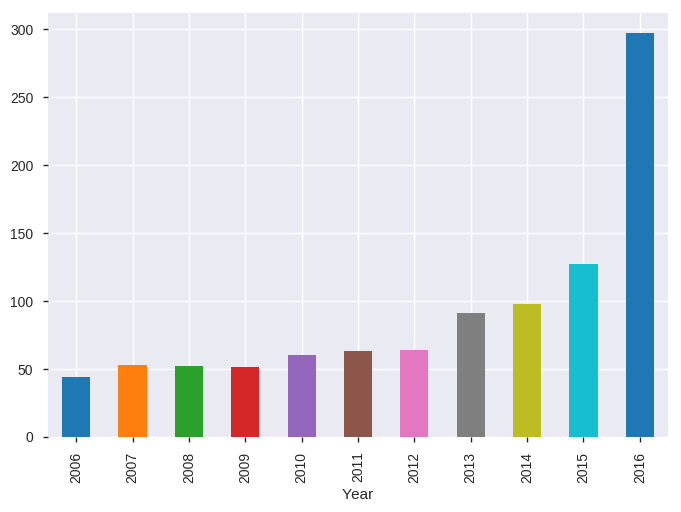

In [18]:
dataframe.groupby('Year')['Title'].count().plot.bar()

- Using Groupby

In [19]:
dataframe.groupby('Year')['Title'].count()

Year
2006     44
2007     53
2008     52
2009     51
2010     60
2011     63
2012     64
2013     91
2014     98
2015    127
2016    297
Name: Title, dtype: int64

#### Observation

From the above plot we can observe that the maximum number of movies have been release in the year 2016.

<a id=section502></a>

### 5.2 Which year highest Revenue was generated ?

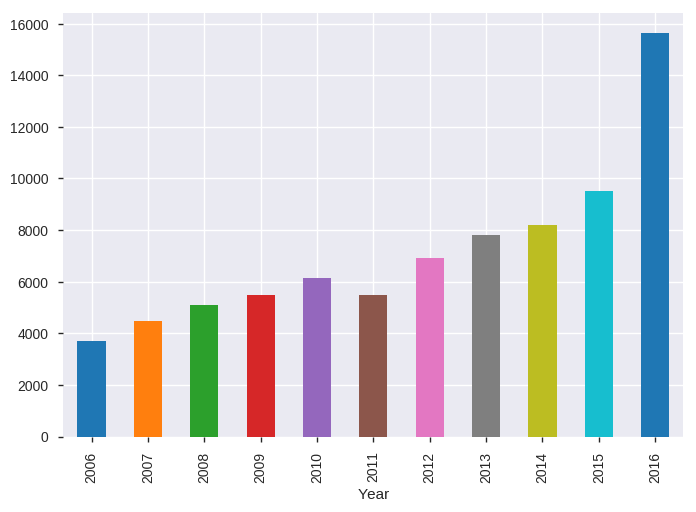

In [20]:
dataframe.groupby('Year')['Revenue (Millions)'].sum().plot.bar()

- Using Groupby

In [21]:
dataframe.groupby('Year')['Revenue (Millions)'].sum().sort_values(ascending=False)

Year
2016    15626.270
2015     9525.910
2014     8189.340
2013     7810.675
2012     6910.290
2010     6133.605
2009     5484.200
2011     5479.945
2008     5101.205
2007     4498.170
2006     3720.430
Name: Revenue (Millions), dtype: float64

#### Observation

From the above plot we can observe that the highest revenue was generated in the year 2016.

<a id=section503></a>

### 5.3 Which Genre movie has generated the highest Revenue ?

- Using Barplot

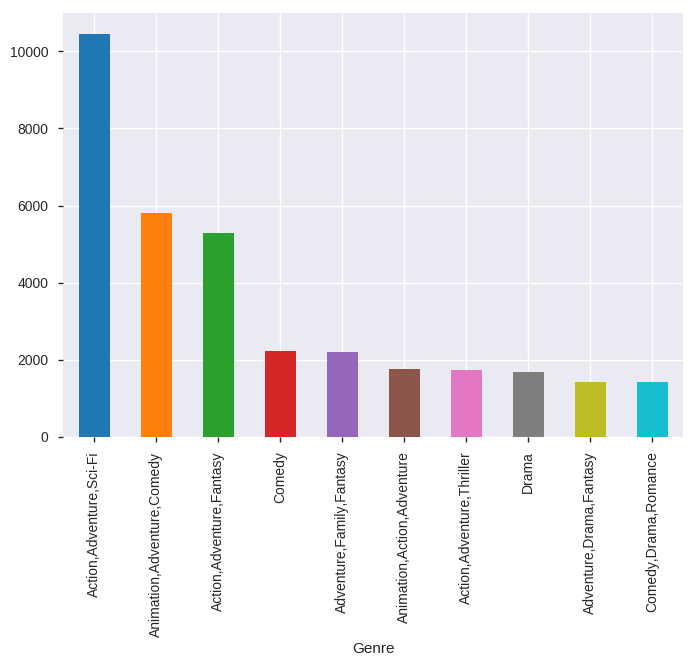

In [22]:
dataframe.groupby('Genre')['Revenue (Millions)'].sum().sort_values(ascending=False).head(10).plot.bar()

- Using Groupby

In [23]:
dataframe.groupby('Genre')['Revenue (Millions)'].sum().sort_values(ascending=False).head(10)

Genre
Action,Adventure,Sci-Fi       10461.510
Animation,Adventure,Comedy     5802.735
Action,Adventure,Fantasy       5296.275
Comedy                         2229.720
Adventure,Family,Fantasy       2201.470
Animation,Action,Adventure     1759.260
Action,Adventure,Thriller      1739.360
Drama                          1669.685
Adventure,Drama,Fantasy        1428.025
Comedy,Drama,Romance           1426.590
Name: Revenue (Millions), dtype: float64

#### Observation

From the above plots we can observe that __Adventure, Action, Comedy, Drama, Animation__ genre movies have  generated high box office revenues. since the top three genres have one or more of the genre __Action,Adventure,Sci-Fi__ , __Animation,Adventure,Comedy__ , __Action,Adventure,Fantasy__

<a id=section504></a>

### 5.4 Which Genre has got highest Rating ?

- Using Barplot

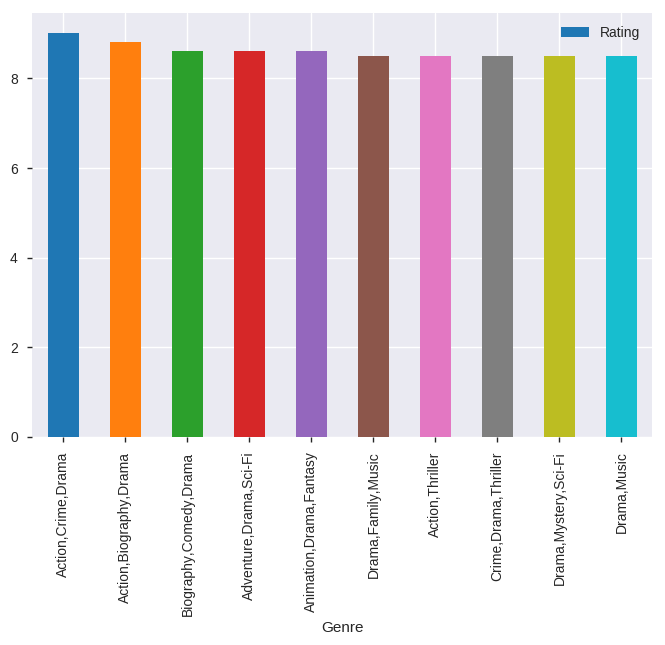

In [24]:
dataframe.groupby('Genre')[['Genre','Rating']].head().sort_values(ascending=False, by='Rating').head(10).plot.bar(x='Genre', y='Rating')

- Using Groupby

In [25]:
dataframe.groupby('Genre')[['Genre','Rating']].head().sort_values(ascending=False, by='Rating').head(10)

,Genre,Rating
54,"Action,Crime,Drama",9.0
117,"Action,Biography,Drama",8.8
249,"Biography,Comedy,Drama",8.6
36,"Adventure,Drama,Sci-Fi",8.6
96,"Animation,Drama,Fantasy",8.6
991,"Drama,Family,Music",8.5
124,"Action,Thriller",8.5
99,"Crime,Drama,Thriller",8.5
64,"Drama,Mystery,Sci-Fi",8.5
133,"Drama,Music",8.5


#### Observation

From the above plots we can observe that __"Action,Crime,Drama" , "Action,Biography,Drama" ,__  
  __"Biography,Comedy,Drama", "Adventure,Drama,Sci-Fi" and  "Animation,Drama,Fantasy"__ are the Genres which have got high rating


<a id=section505></a>

### 5.5 Which Director has directed maximum number of movies?

- Using Barplot

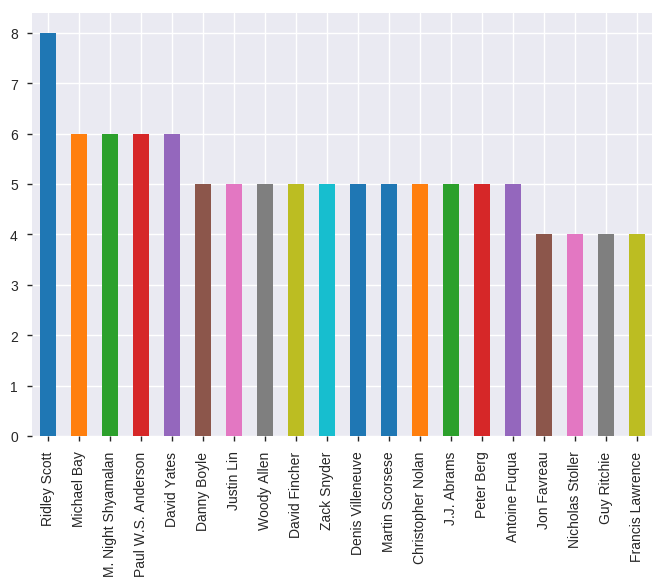

In [26]:
dataframe['Director'].value_counts().head(20).plot.bar()

- Using Groupby

In [27]:
dataframe['Director'].value_counts().head(10)

Ridley Scott          8
Michael Bay           6
M. Night Shyamalan    6
Paul W.S. Anderson    6
David Yates           6
Danny Boyle           5
Justin Lin            5
Woody Allen           5
David Fincher         5
Zack Snyder           5
Name: Director, dtype: int64

#### Observation

From the above bar plot we can obsever that __Ridley Scott__ has directed the maximum number of movies, followed by  __Michael Bay, Paul W.S. Anderson, M. Night Shyamalan and David Yates__.

<a id=section506></a>

### 5.6. Which directors has the highest revenue generated ?

- Using Barplot

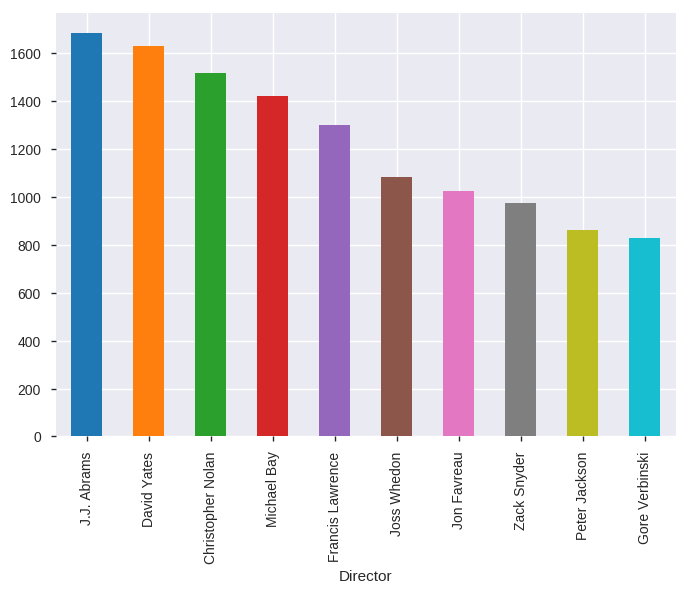

In [28]:
dataframe.groupby('Director')['Revenue (Millions)'].sum().sort_values(ascending=False).head(10).plot.bar()

- using Groupby

In [29]:
dataframe.groupby('Director')['Revenue (Millions)'].sum().sort_values(ascending=False).head(10)

Director
J.J. Abrams          1683.45
David Yates          1630.51
Christopher Nolan    1515.09
Michael Bay          1421.32
Francis Lawrence     1299.81
Joss Whedon          1082.27
Jon Favreau          1025.60
Zack Snyder           975.74
Peter Jackson         860.45
Gore Verbinski        829.82
Name: Revenue (Millions), dtype: float64

#### Observation

From the above bar plot we can obsever that __J.J. Abrams__ has generated the highest revenue, followed by  __David Yates and Christopher Nolan__.

<a id=section507></a>

### 5.7 Establish correlation between all the features using heatmap.

Text(0.5,1,'Correlation between features')

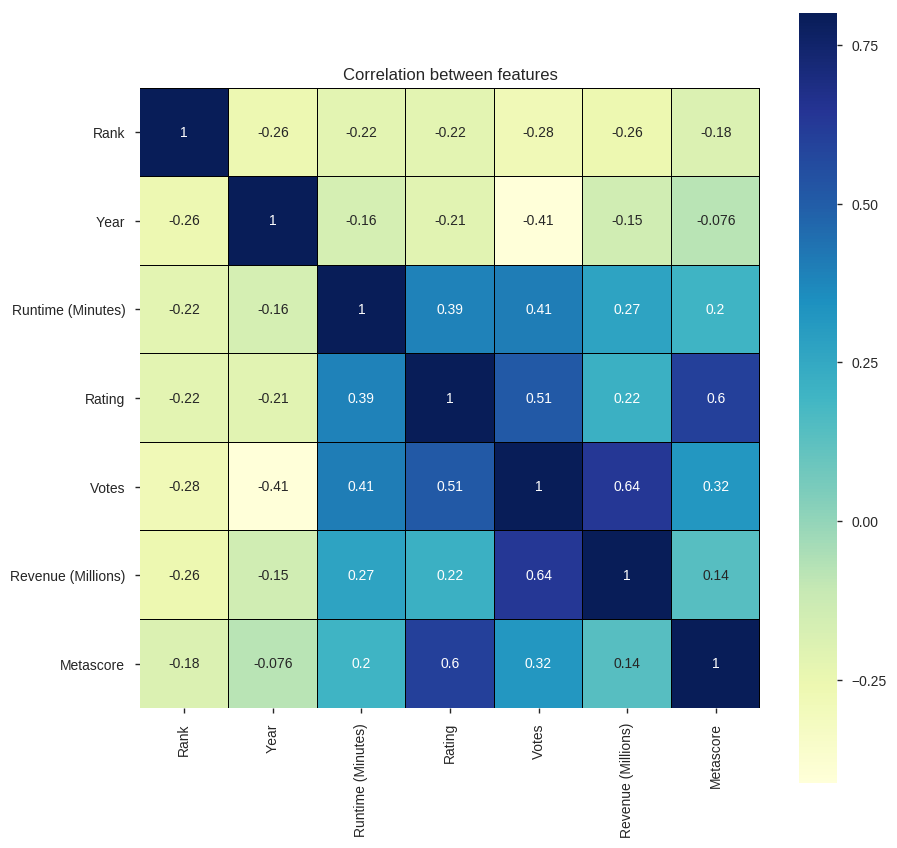

In [30]:
corr = dataframe.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,vmax=.8,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='black')
plt.title('Correlation between features')

#### Observation

From the above heatmap we can observe that 
- __Votes has a high positive correlation with Revenue (Millions)__
- __Rating has a positive correlation with Metascore & Votes__
- __Runtime (Minutes) has a positive correlation with Rating and Votes__

<a id=section508></a>

### 5.8 Relationship between 'Rating', 'Votes', 'Metascore'and 'Blockbuster'

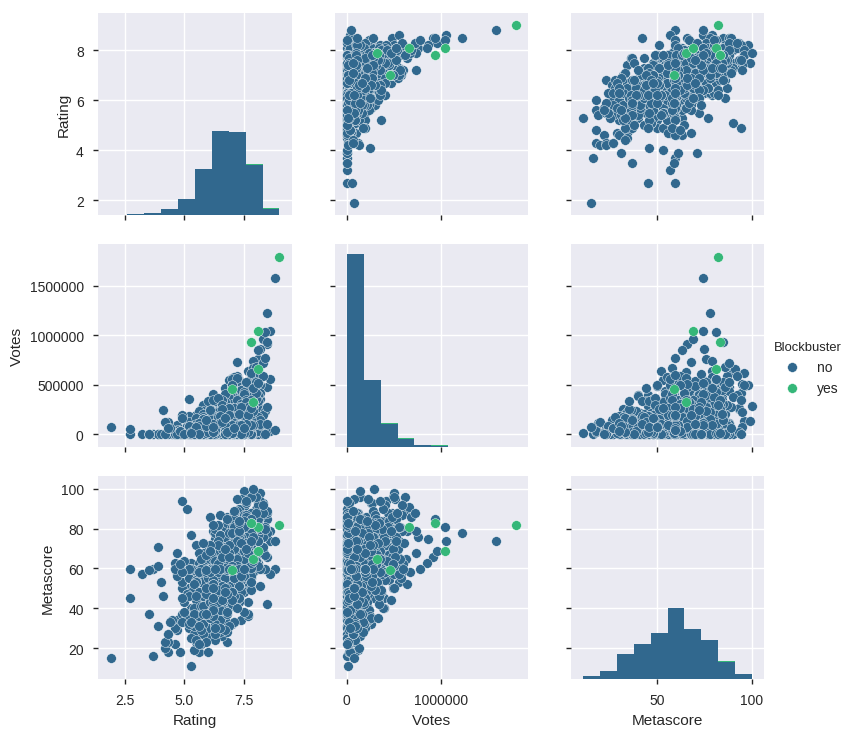

In [31]:
sns.pairplot(dataframe, x_vars=['Rating', 'Votes', 'Metascore'], y_vars= ['Rating', 'Votes', 'Metascore'], hue='Blockbuster',palette='viridis')

#### Observation

From the above we can observer from the above plot that Blockbuster depends on __'Rating', 'Votes', 'Metascore'__ parameters.

<a id=section509></a>

### 5.9 Analyzing Rating with Metascore and Revenue (Millions).

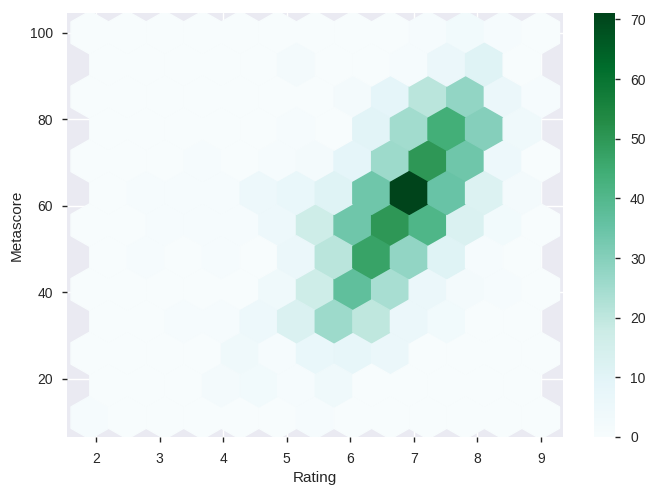

In [32]:
dataframe.plot.hexbin(x='Rating', y='Metascore', gridsize=12)

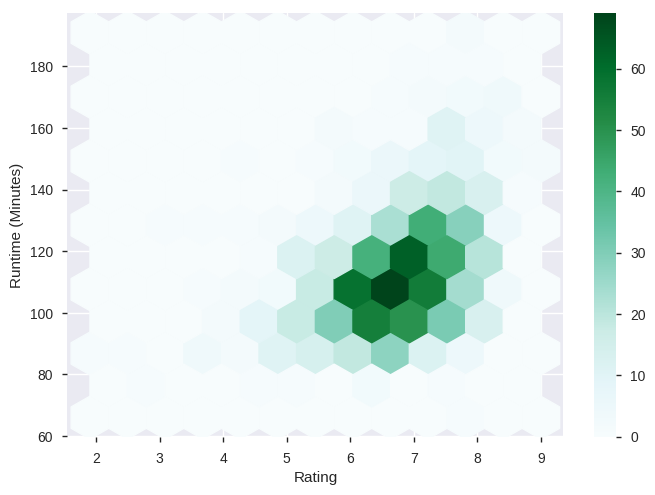

In [33]:
dataframe.plot.hexbin(x='Rating', y='Runtime (Minutes)', gridsize=12)

#### Observation
From the above we can see that the Metascore and Runtime (Minutes) is directly proportional to Rating of the movies. Most of the Rating fall between 6 to 8, Metascore from 30 to 90 and Runtime from 90 to 130 mins.

<a id=section510></a>

### 5.10 Analyzing based on the column "Blockbuster"

boxplot is a method for graphically depicting groups of numerical data through their quartiles, 

- Using the box plot lets categorise the data of __'Rating'__ column with respect to __'Blockbuster'__

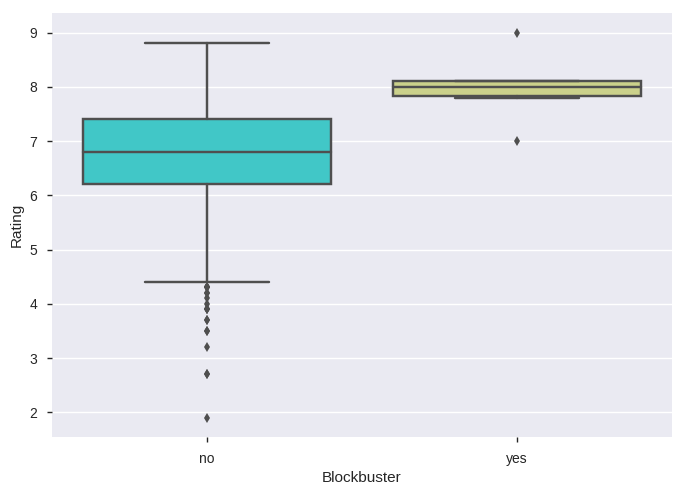

In [34]:
sns.boxplot(x="Blockbuster", y="Rating", data=dataframe, palette='rainbow')

- Using the box plot lets categorise the data of __'Metascore'__ column with respect to __'Blockbuster'__

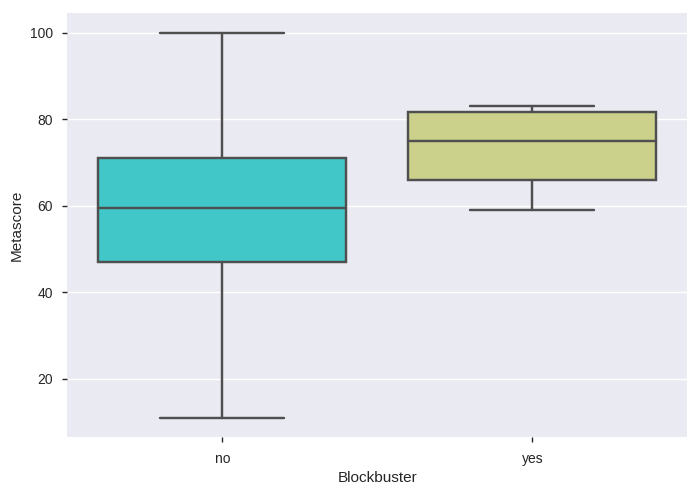

In [35]:
sns.boxplot(x="Blockbuster", y="Metascore", data=dataframe, palette='rainbow')

- Using the box plot lets categorise the data of __'Runtime (Minutes)'__ column with respect to __'Blockbuster'__

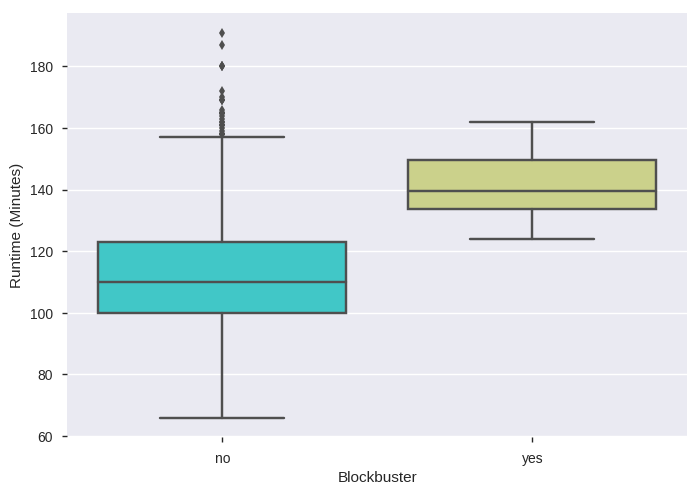

In [36]:
sns.boxplot(x="Blockbuster", y="Runtime (Minutes)", data=dataframe, palette='rainbow')

- Using the box plot lets categorise the data of __'Votes'__ column with respect to __'Blockbuster'__

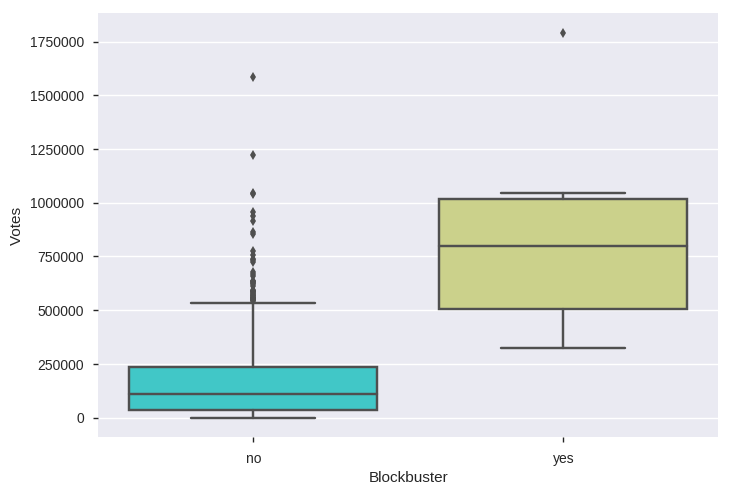

In [37]:
sns.boxplot(x="Blockbuster", y="Votes", data=dataframe, palette='rainbow')

- Using the box plot lets categorise the data of __'Revenue (Millions)'__ column with respect to __'Blockbuster'__

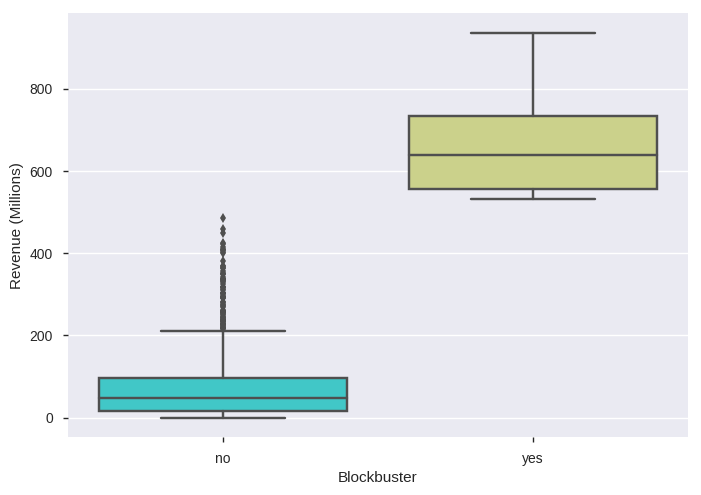

In [38]:
sns.boxplot(x="Blockbuster", y="Revenue (Millions)", data=dataframe, palette='rainbow')

#### Observation

From the above we can compare the grouped __blockbuster__ column with __Rating, Metascore, Runtime (Minutes), Votes,'Revenue (Millions)__.

<a id=section6></a>

## 6. Conclusion 

- With the help of this notebook we learnt how exploratory data analysis can be carried out using Pandas plotting.
- Also we have seen making use of packages like __matplotlib and seaborn__ to develop better insights about the data.
- We have also seen how __pre processing__ helps in dealing with _missing_ values and irregularities present in the data. 
- We also make use of __pandas profiling__ feature to generate an html report containing all the information of the various features present in the dataset.
- We also learnt how to _create new features_ which will in turn help us to better predict the trend for making a blockbuster movie.
- we have seen that the year __2016 has the most no of movie released__ and  __has the highest revenue generated__
- we have seen that director __Ridley Scott__ has directed the maximum number of movies
- We have seen the impact of columns like _Rating, Votes, Metascore and Runtime (Minutes)_ on the Revenue.
- We have see that  __Metascore and Runtime (Minutes) is directly proportional to Rating of the movies.__
- we have seen that __Votes has a high positive correlation with Revenue__ also __Rating has a positive correlation with Metascore & Votes__ and __Runtime (Minutes) has a positive correlation with Rating and Votes.__
- we have seen that Blockbuster movies depends on __'Rating', 'Votes', 'Metascore'.__
- we have seen that __Adventure, Action, Comedy, Drama, Animation__ genre movies, have generated high box office revenues.
- we have seen that Directors __J.J. Abrams, David Yates and Christopher Nolan__ movies are the highest revenue generating movies in the box office
- This analysis will help us to choose which __machine learning model__ we can apply to predict the genre and director which can generate a box of hit movie for the production house. 